In [191]:
#Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [99]:
kcal_dataset = pd.read_csv('data/Food_Supply_kcal_Data.csv')
protein_dataset = pd.read_csv('data/Protein_Supply_Quantity_Data.csv')
kg_dataset = pd.read_csv('data/Food_Supply_Quantity_kg_Data.csv')
fat_dataset = pd.read_csv('data/Fat_Supply_Quantity_Data.csv')

In [239]:
data = pd.read_csv('data/merged_df.csv')
data.columns

Index(['Alcoholic Beverages_kcal', 'Animal Products_kcal', 'Animal fats_kcal',
       'Aquatic Products, Other_kcal', 'Cereals - Excluding Beer_kcal',
       'Eggs_kcal', 'Fish, Seafood_kcal', 'Fruits - Excluding Wine_kcal',
       'Meat_kcal', 'Milk - Excluding Butter_kcal', 'Miscellaneous_kcal',
       'Offals_kcal', 'Oilcrops_kcal', 'Pulses_kcal', 'Spices_kcal',
       'Starchy Roots_kcal', 'Stimulants_kcal', 'Sugar Crops_kcal',
       'Sugar & Sweeteners_kcal', 'Treenuts_kcal', 'Vegetal Products_kcal',
       'Vegetable Oils_kcal', 'Vegetables_kcal', 'Alcoholic Beverages_f',
       'Animal Products_f', 'Animal fats_f', 'Aquatic Products, Other_f',
       'Cereals - Excluding Beer_f', 'Eggs_f', 'Fish, Seafood_f',
       'Fruits - Excluding Wine_f', 'Meat_f', 'Miscellaneous_f',
       'Milk - Excluding Butter_f', 'Offals_f', 'Oilcrops_f', 'Pulses_f',
       'Spices_f', 'Starchy Roots_f', 'Stimulants_f', 'Sugar Crops_f',
       'Sugar & Sweeteners_f', 'Treenuts_f', 'Vegetal Products_f

In [195]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 100 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Alcoholic Beverages_kcal       164 non-null    float64
 1   Animal Products_kcal           164 non-null    float64
 2   Animal fats_kcal               164 non-null    float64
 3   Aquatic Products, Other_kcal   164 non-null    float64
 4   Cereals - Excluding Beer_kcal  164 non-null    float64
 5   Eggs_kcal                      164 non-null    float64
 6   Fish, Seafood_kcal             164 non-null    float64
 7   Fruits - Excluding Wine_kcal   164 non-null    float64
 8   Meat_kcal                      164 non-null    float64
 9   Milk - Excluding Butter_kcal   164 non-null    float64
 10  Miscellaneous_kcal             164 non-null    float64
 11  Offals_kcal                    164 non-null    float64
 12  Oilcrops_kcal                  164 non-null    fl

In [240]:
data_kcal

,Alcoholic Beverages_kcal,Animal Products_kcal,Animal fats_kcal,"Aquatic Products, Other_kcal",Cereals - Excluding Beer_kcal,Eggs_kcal,"Fish, Seafood_kcal",Fruits - Excluding Wine_kcal,Meat_kcal,Milk - Excluding Butter_kcal,...,Spices_kcal,Starchy Roots_kcal,Stimulants_kcal,Sugar Crops_kcal,Sugar & Sweeteners_kcal,Treenuts_kcal,Vegetal Products_kcal,Vegetable Oils_kcal,Vegetables_kcal,Obesity
0,0.0000,4.7774,0.8504,0.0,37.1186,0.1501,0.0000,1.4757,1.2006,2.4512,...,0.1001,0.3252,0.0750,0.0000,2.2261,0.1251,45.2476,2.3012,0.7504,4.5
1,0.9120,16.0930,1.0591,0.0,16.2107,0.8091,0.1471,3.8982,3.8688,9.9441,...,0.0000,1.2651,0.2501,0.0000,3.4422,0.3972,33.9070,2.8244,2.7508,22.3
2,0.0896,6.0326,0.1941,0.0,25.0112,0.4181,0.1195,3.1805,1.2543,3.9869,...,0.1195,1.9262,0.1493,0.0000,3.9869,0.2240,43.9749,5.7638,2.0457,26.6
3,1.9388,4.6927,0.2644,0.0,18.3521,0.0441,0.8372,2.3133,2.9302,0.5067,...,0.0000,12.6239,0.0441,0.0000,2.7539,0.0000,45.3184,4.2741,0.3525,6.8
4,2.3041,15.3672,1.5429,0.0,13.7215,0.2057,1.7280,3.6824,7.0356,4.6904,...,0.3497,0.8434,0.4937,0.0000,5.8218,0.0823,34.6225,4.6904,1.2960,19.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,0.8454,7.2303,0.6007,0.0,21.3126,0.2892,0.4449,2.3804,3.1368,2.6474,...,0.0000,1.3571,0.0667,0.0000,7.7864,0.0000,42.7586,7.5417,0.6674,25.2
160,0.7150,10.9806,0.9363,0.0,26.9833,0.2894,1.0385,1.8046,7.8311,0.5618,...,0.4256,0.7150,0.1021,0.1532,2.0940,0.3575,39.0364,1.3279,1.9578,2.1
161,0.0000,3.4667,0.3394,0.0,32.0727,0.1455,0.1697,1.1879,2.0121,0.6545,...,0.0485,0.3152,0.1212,0.0000,7.0303,0.0242,46.5455,3.9515,0.3636,14.1
162,1.1925,3.3043,0.3230,0.0,31.5528,0.1988,0.5714,0.2236,1.5155,0.5217,...,0.0745,4.0994,0.0248,0.0000,2.5590,0.0000,46.7081,3.0062,0.4472,6.5


## Using kcal dataset

In [274]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.model_selection import cross_validate

# ['Deaths', 'Recovered', 'Confirmed']
kcal_cols = [col for col in data.columns if col.endswith('kcal')] + ['Obesity']
data_kcal = data[kcal_cols]

#### Ridge Regression for kcal dataset on Confirmed Cases

In [280]:
# Separating X and y and scaling X due to data distribution
X = data_kcal
X = MinMaxScaler().fit_transform(X)
y = data['Confirmed']

# Train-test split of data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle = True, random_state = 42)

# Instantiate and fit model
lr_confirmed = Ridge()
lr_confirmed.fit(X_train, y_train)

# Using cross_validate to obtain additional parameters such as coefficients of each CV model
cv_results = cross_validate(lr_confirmed, X_train, y_train, cv=6, return_estimator=True)

cv_mse = cross_val_score(lr_confirmed,X_train, y_train, cv=6, scoring='neg_mean_squared_error')
cv_r2 = cross_val_score(lr_confirmed,X_train, y_train, cv=6, scoring='r2')

# Calculating mean_squared_error
print('Mean squared error: %.3f'
      % abs(cv_mse.mean()))
# Calculating Coefficient of determination
print('Coefficient of determination: %.2f'
      % cv_r2.mean())

Mean squared error: 2.97
Coefficient of determination: 0.44


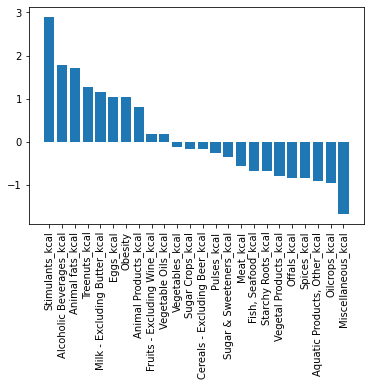

In [302]:
# Identifying the most influential features via model coefficients
importance = lr_confirmed.coef_

feat_importance = zip(data_kcal.columns, importance)
feat_importance = sorted([x for x in feat_importance], key = lambda x: x[1], reverse=True)
feat_importance
plt.bar(*zip(*feat_importance))
plt.xticks(rotation=90)
plt.show()

#### Linear Regression for kcal dataset on Deaths

Mean squared error: 0.001
Coefficient of determination: 0.40


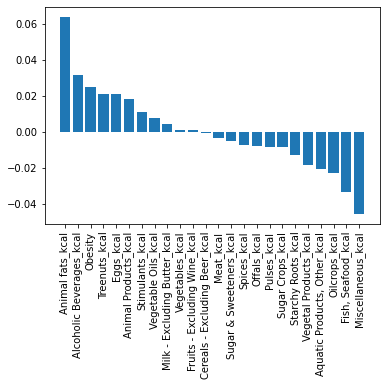

In [307]:
# Separating X and y and scaling X due to data distribution
X = data_kcal
X = MinMaxScaler().fit_transform(X)
y = data['Deaths']

# Train-test split of data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle = True, random_state = 42)

# Instantiate and fit model
lr_deaths = Ridge()
lr_deaths.fit(X_train, y_train)

# Using cross_validate to obtain additional parameters such as coefficients of each CV model
cv_results = cross_validate(lr_deaths, X_train, y_train, cv=6, return_estimator=True)

cv_mse = cross_val_score(lr_deaths,X_train, y_train, cv=6, scoring='neg_mean_squared_error')
cv_r2 = cross_val_score(lr_deaths,X_train, y_train, cv=6, scoring='r2')

# Calculating mean_squared_error

print('Mean squared error: %.3f'
      % abs(cv_mse.mean()))
# Calculating Coefficient of determination
print('Coefficient of determination: %.2f'
      % cv_r2.mean())

# Identifying the most influential features via model coefficients
importance = lr_deaths.coef_

feat_importance = zip(data_kcal.columns, importance)
feat_importance = sorted([x for x in feat_importance], key = lambda x: x[1], reverse=True)
feat_importance
plt.bar(*zip(*feat_importance))
plt.xticks(rotation=90)
plt.show()

#### Linear Regression for kcal dataset on Recovered

Mean squared error: 2.828
Coefficient of determination: 0.32


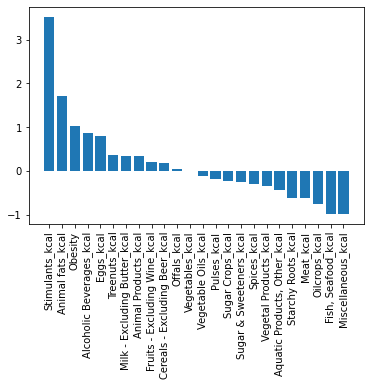

In [308]:
# Separating X and y and scaling X due to data distribution
X = data_kcal
X = MinMaxScaler().fit_transform(X)
y = data['Recovered']

# Train-test split of data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle = True, random_state = 42)

# Instantiate and fit model
lr_recovered = Ridge()
lr_recovered.fit(X_train, y_train)

# Using cross_validate to obtain additional parameters such as coefficients of each CV model
cv_results = cross_validate(lr_recovered, X_train, y_train, cv=6, return_estimator=True)

cv_mse = cross_val_score(lr_recovered,X_train, y_train, cv=6, scoring='neg_mean_squared_error')
cv_r2 = cross_val_score(lr_recovered,X_train, y_train, cv=6, scoring='r2')

# Calculating mean_squared_error

print('Mean squared error: %.3f'
      % abs(cv_mse.mean()))
# Calculating Coefficient of determination
print('Coefficient of determination: %.2f'
      % cv_r2.mean())

# Identifying the most influential features via model coefficients
importance = lr_recovered.coef_

feat_importance = zip(data_kcal.columns, importance)
feat_importance = sorted([x for x in feat_importance], key = lambda x: x[1], reverse=True)
feat_importance
plt.bar(*zip(*feat_importance))
plt.xticks(rotation=90)
plt.show()

## Using protein dataset

In [309]:
protein_cols = [col for col in data.columns if col.endswith('p')] + ['Obesity']
data_pro = data[protein_cols]
data_pro

,Alcoholic Beverages_p,Animal Products_p,Animal fats_p,"Aquatic Products, Other_p",Cereals - Excluding Beer_p,Eggs_p,"Fish, Seafood_p",Fruits - Excluding Wine_p,Meat_p,Milk - Excluding Butter_p,...,Starchy Roots_p,Stimulants_p,Sugar Crops_p,Sugar & Sweeteners_p,Treenuts_p,Vegetal Products_p,Vegetable Oils_p,Vegetables_p,Miscellaneous_p,Obesity
0,0.0000,9.7523,0.0277,0.0000,35.9771,0.4067,0.0647,0.5824,3.1337,5.5278,...,0.1941,0.5546,0.0000,0.0000,0.1387,40.2477,0.0000,1.1370,0.0462,4.5
1,0.1840,27.7469,0.0711,0.0000,14.2331,1.8069,0.6274,1.2757,7.6582,16.4750,...,0.8867,0.2635,0.0000,0.0042,0.2677,22.2552,0.0084,3.2456,0.0544,22.3
2,0.0323,13.8360,0.0054,0.0000,26.5633,1.2916,0.6350,1.1624,3.5088,8.0616,...,1.4638,0.4628,0.0000,0.0000,0.2745,36.1694,0.0269,3.1267,0.1399,26.6
3,0.6285,15.2311,0.0277,0.0000,20.3882,0.1756,5.4436,1.2754,7.6248,1.1460,...,5.1941,0.1017,0.0000,0.0092,0.0092,34.7782,0.0092,0.8133,0.0924,6.8
4,0.1535,33.1901,0.1289,0.0000,10.5108,0.4850,8.2146,1.2586,16.0670,7.4349,...,0.4666,0.4113,0.0000,0.0000,0.0737,16.8161,0.0430,1.6024,0.2947,19.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,0.1955,22.5411,0.1244,0.0000,21.6526,0.8707,2.6477,1.0662,11.8347,6.3083,...,1.1195,0.3287,0.0000,0.0178,0.0000,27.4545,0.0533,1.0129,0.0267,25.2
160,0.1555,20.4466,0.1555,0.0056,18.5247,0.7665,5.7435,0.7165,11.0426,1.0887,...,0.2333,0.5444,0.0167,0.0056,0.3277,29.5617,0.0000,3.7216,0.0389,2.1
161,0.0000,10.0122,0.0188,0.0000,35.1179,0.4320,0.9392,0.4884,5.9453,1.9630,...,0.2066,0.3193,0.0000,0.0000,0.0188,39.9831,0.0000,0.5448,0.0564,14.1
162,0.4824,9.8925,0.0338,0.0000,28.5182,0.5839,3.0126,0.0931,4.3158,1.0324,...,1.2863,0.0762,0.0000,0.0000,0.0000,40.1117,0.0000,0.8039,0.0592,6.5


#### Linear Regression for protein dataset on Confirmed Cases

Mean squared error: 2.960
Coefficient of determination: 0.45


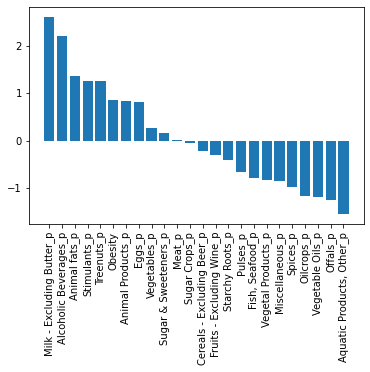

In [310]:
# Separating X and y and scaling X due to data distribution
X = data_pro
X = MinMaxScaler().fit_transform(X)
y = data['Confirmed']

# Train-test split of data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle = True, random_state = 42)

# Instantiate and fit model
lr_confirmed = Ridge()
lr_confirmed.fit(X_train, y_train)

# Using cross_validate to obtain additional parameters such as coefficients of each CV model
cv_results = cross_validate(lr_confirmed, X_train, y_train, cv=6, return_estimator=True)

cv_mse = cross_val_score(lr_confirmed,X_train, y_train, cv=6, scoring='neg_mean_squared_error')
cv_r2 = cross_val_score(lr_confirmed,X_train, y_train, cv=6, scoring='r2')

# Calculating mean_squared_error

print('Mean squared error: %.3f'
      % abs(cv_mse.mean()))
# Calculating Coefficient of determination
print('Coefficient of determination: %.2f'
      % cv_r2.mean())

# Identifying the most influential features via model coefficients
importance = lr_confirmed.coef_

feat_importance = zip(data_pro.columns, importance)
feat_importance = sorted([x for x in feat_importance], key = lambda x: x[1], reverse=True)
feat_importance
plt.bar(*zip(*feat_importance))
plt.xticks(rotation=90)
plt.show()

#### Linear Regression for protein dataset on Deaths

Mean squared error: 0.001
Coefficient of determination: 0.39


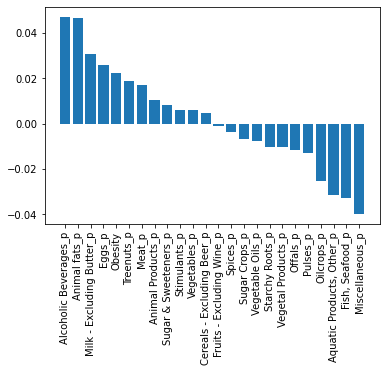

In [313]:
# Separating X and y and scaling X due to data distribution
X = data_pro
X = MinMaxScaler().fit_transform(X)
y = data['Deaths']

# Train-test split of data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle = True, random_state = 42)

# Instantiate and fit model
lr_deaths = Ridge()
lr_deaths.fit(X_train, y_train)

# Using cross_validate to obtain additional parameters such as coefficients of each CV model
cv_results = cross_validate(lr_deaths, X_train, y_train, cv=6, return_estimator=True)

cv_mse = cross_val_score(lr_deaths,X_train, y_train, cv=6, scoring='neg_mean_squared_error')
cv_r2 = cross_val_score(lr_deaths,X_train, y_train, cv=6, scoring='r2')

# Calculating mean_squared_error

print('Mean squared error: %.3f'
      % abs(cv_mse.mean()))
# Calculating Coefficient of determination
print('Coefficient of determination: %.2f'
      % cv_r2.mean())

# Identifying the most influential features via model coefficients
importance = lr_deaths.coef_

feat_importance = zip(data_pro.columns, importance)
feat_importance = sorted([x for x in feat_importance], key = lambda x: x[1], reverse=True)
feat_importance
plt.bar(*zip(*feat_importance))
plt.xticks(rotation=90)
plt.show()

#### Linear Regression for protein dataset on Recovered

Mean squared error: 2.936
Coefficient of determination: 0.31


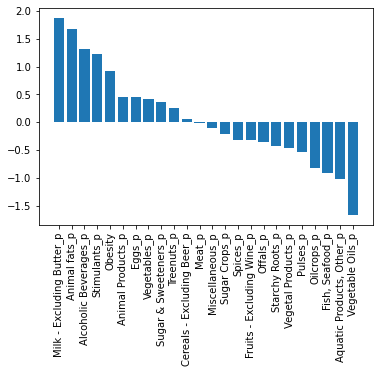

In [314]:
# Separating X and y and scaling X due to data distribution
X = data_pro
X = MinMaxScaler().fit_transform(X)
y = data['Recovered']

# Train-test split of data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle = True, random_state = 42)

# Instantiate and fit model
lr_recovered = Ridge()
lr_recovered.fit(X_train, y_train)

# Using cross_validate to obtain additional parameters such as coefficients of each CV model
cv_results = cross_validate(lr_recovered, X_train, y_train, cv=6, return_estimator=True)

cv_mse = cross_val_score(lr_recovered,X_train, y_train, cv=6, scoring='neg_mean_squared_error')
cv_r2 = cross_val_score(lr_recovered,X_train, y_train, cv=6, scoring='r2')

# Calculating mean_squared_error

print('Mean squared error: %.3f'
      % abs(cv_mse.mean()))
# Calculating Coefficient of determination
print('Coefficient of determination: %.2f'
      % cv_r2.mean())

# Identifying the most influential features via model coefficients
importance = lr_recovered.coef_

feat_importance = zip(data_pro.columns, importance)
feat_importance = sorted([x for x in feat_importance], key = lambda x: x[1], reverse=True)
feat_importance
plt.bar(*zip(*feat_importance))
plt.xticks(rotation=90)
plt.show()

## Using kg dataset

In [315]:
kg_cols = [col for col in data.columns if col.endswith('kg')] + ['Obesity']
data_kg = data[kg_cols]
data_kg

,Alcoholic Beverages_kg,Animal fats_kg,Animal Products_kg,"Aquatic Products, Other_kg",Cereals - Excluding Beer_kg,Eggs_kg,"Fish, Seafood_kg",Fruits - Excluding Wine_kg,Meat_kg,Milk - Excluding Butter_kg,...,Spices_kg,Starchy Roots_kg,Stimulants_kg,Sugar & Sweeteners_kg,Sugar Crops_kg,Treenuts_kg,Vegetable Oils_kg,Vegetables_kg,Vegetal Products_kg,Obesity
0,0.0014,0.1973,9.4341,0.0000,24.8097,0.2099,0.0350,5.3495,1.2020,7.5828,...,0.0574,0.8802,0.3078,1.3489,0.000,0.0770,0.5345,6.7642,40.5645,4.5
1,1.6719,0.1357,18.7684,0.0000,5.7817,0.5815,0.2126,6.7861,1.8845,15.7213,...,0.0008,1.8096,0.1055,1.5367,0.000,0.1515,0.3261,11.7753,31.2304,22.3
2,0.2711,0.0282,9.6334,0.0000,13.6816,0.5277,0.2416,6.3801,1.1305,7.6189,...,0.0557,4.1340,0.2216,1.8342,0.000,0.1152,1.0310,11.6484,40.3651,26.6
3,5.8087,0.0560,4.9278,0.0000,9.1085,0.0587,1.7707,6.0005,2.0571,0.8311,...,0.0009,18.1102,0.0508,1.8495,0.000,0.0061,0.6463,2.3041,45.0722,6.8
4,3.5764,0.0087,16.6613,0.0000,5.9960,0.2274,4.1489,10.7451,5.6888,6.3663,...,0.1524,1.4522,0.1564,3.8749,0.000,0.0253,0.8102,5.4495,33.3233,19.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,2.5952,0.0403,14.7565,0.0000,12.9253,0.3389,0.9456,7.6460,3.8328,9.3920,...,0.0009,2.5643,0.1479,3.4106,0.000,0.0009,1.3734,4.1474,35.2416,25.2
160,1.4591,0.1640,8.5765,0.0042,16.8740,0.3077,2.6392,5.9029,4.4382,0.6069,...,0.2074,1.0596,0.2880,1.2846,0.815,0.3070,0.2201,11.9508,41.4232,2.1
161,0.0364,0.0446,5.7874,0.0000,27.2077,0.2579,0.5240,5.1344,2.7871,1.8911,...,0.0347,1.0794,0.2199,5.0468,0.000,0.0017,1.0811,3.2135,44.2126,14.1
162,5.7360,0.0829,6.0197,0.0000,21.1938,0.3399,1.6924,1.0183,1.8427,1.7570,...,0.0478,7.9649,0.0618,1.5632,0.000,0.0014,0.6657,3.4649,43.9789,6.5


#### Linear Regression for kg dataset on Confirmed Cases

Mean squared error: 3.332
Coefficient of determination: 0.39


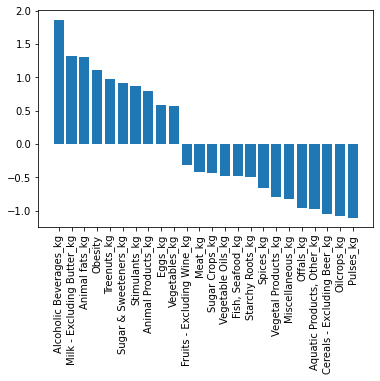

In [316]:
# Separating X and y and scaling X due to data distribution
X = data_kg
X = MinMaxScaler().fit_transform(X)
y = data['Confirmed']

# Train-test split of data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle = True, random_state = 42)

# Instantiate and fit model
lr_confirmed = Ridge()
lr_confirmed.fit(X_train, y_train)

# Using cross_validate to obtain additional parameters such as coefficients of each CV model
cv_results = cross_validate(lr_confirmed, X_train, y_train, cv=6, return_estimator=True)

cv_mse = cross_val_score(lr_confirmed,X_train, y_train, cv=6, scoring='neg_mean_squared_error')
cv_r2 = cross_val_score(lr_confirmed,X_train, y_train, cv=6, scoring='r2')

# Calculating mean_squared_error

print('Mean squared error: %.3f'
      % abs(cv_mse.mean()))
# Calculating Coefficient of determination
print('Coefficient of determination: %.2f'
      % cv_r2.mean())

# Identifying the most influential features via model coefficients
importance = lr_confirmed.coef_

feat_importance = zip(data_kg.columns, importance)
feat_importance = sorted([x for x in feat_importance], key = lambda x: x[1], reverse=True)
feat_importance
plt.bar(*zip(*feat_importance))
plt.xticks(rotation=90)
plt.show()

#### Linear Regression for protein dataset on Deaths

Mean squared error: 0.001
Coefficient of determination: 0.40


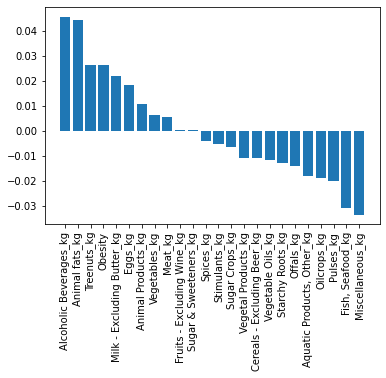

In [317]:
# Separating X and y and scaling X due to data distribution
X = data_kg
X = MinMaxScaler().fit_transform(X)
y = data['Deaths']

# Train-test split of data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle = True, random_state = 42)

# Instantiate and fit model
lr_deaths = Ridge()
lr_deaths.fit(X_train, y_train)

# Using cross_validate to obtain additional parameters such as coefficients of each CV model
cv_results = cross_validate(lr_deaths, X_train, y_train, cv=6, return_estimator=True)

cv_mse = cross_val_score(lr_deaths,X_train, y_train, cv=6, scoring='neg_mean_squared_error')
cv_r2 = cross_val_score(lr_deaths,X_train, y_train, cv=6, scoring='r2')

# Calculating mean_squared_error

print('Mean squared error: %.3f'
      % abs(cv_mse.mean()))
# Calculating Coefficient of determination
print('Coefficient of determination: %.2f'
      % cv_r2.mean())

# Identifying the most influential features via model coefficients
importance = lr_deaths.coef_

feat_importance = zip(data_kg.columns, importance)
feat_importance = sorted([x for x in feat_importance], key = lambda x: x[1], reverse=True)
feat_importance
plt.bar(*zip(*feat_importance))
plt.xticks(rotation=90)
plt.show()

#### Linear Regression for protein dataset on Recovered

Mean squared error: 3.254
Coefficient of determination: 0.23


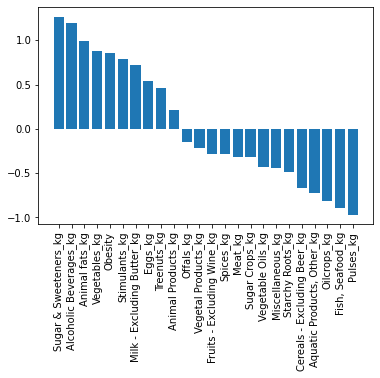

In [318]:
# Separating X and y and scaling X due to data distribution
X = data_kg
X = MinMaxScaler().fit_transform(X)
y = data['Recovered']

# Train-test split of data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle = True, random_state = 42)

# Instantiate and fit model
lr_recovered = Ridge()
lr_recovered.fit(X_train, y_train)

# Using cross_validate to obtain additional parameters such as coefficients of each CV model
cv_results = cross_validate(lr_recovered, X_train, y_train, cv=6, return_estimator=True)

cv_mse = cross_val_score(lr_recovered,X_train, y_train, cv=6, scoring='neg_mean_squared_error')
cv_r2 = cross_val_score(lr_recovered,X_train, y_train, cv=6, scoring='r2')

# Calculating mean_squared_error

print('Mean squared error: %.3f'
      % abs(cv_mse.mean()))
# Calculating Coefficient of determination
print('Coefficient of determination: %.2f'
      % cv_r2.mean())

# Identifying the most influential features via model coefficients
importance = lr_recovered.coef_

feat_importance = zip(data_kg.columns, importance)
feat_importance = sorted([x for x in feat_importance], key = lambda x: x[1], reverse=True)
feat_importance
plt.bar(*zip(*feat_importance))
plt.xticks(rotation=90)
plt.show()